In [68]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import datetime 

In [69]:
df= pd.read_csv('/Users/macbookpro/Desktop/Mahmoud/Data Preprocessing/Sales+Uber/My Uber Drives - 2016.csv')

In [70]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [71]:
df.columns

Index(['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'MILES*',
       'PURPOSE*'],
      dtype='object')

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [73]:
df.describe()

,MILES*
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [74]:
df.shape

(1156, 7)

In [75]:
# Convert 'START_DATE*' and 'END_DATE*' columns to datetime format with specific format
df['START_DATE*'] = pd.to_datetime(df['START_DATE*'], format='%m/%d/%Y %H:%M', errors='coerce')
df['END_DATE*'] = pd.to_datetime(df['END_DATE*'], format='%m/%d/%Y %H:%M', errors='coerce')

# Calculate elapsed time for each ride in minutes
df['Elapsed_Time'] = (df['END_DATE*'] - df['START_DATE*']).dt.total_seconds() / 60


In [76]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,Elapsed_Time
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0


# Uni Variate

In [77]:
df['MILES*'].value_counts()

MILES*
9.9        28
3.1        26
2.1        19
10.4       19
3.0        19
           ..
30.0        1
46.9        1
40.2        1
16.6        1
12204.7     1
Name: count, Length: 257, dtype: int64

In [78]:
df["miles"]=df['MILES*']

In [79]:
# Drop the 'MILES*' column from the DataFrame
df.drop(columns=['MILES*'], inplace=True)


In [80]:
df.miles.quantile([0.25,0.5,0.75])

0.25     2.9
0.50     6.0
0.75    10.4
Name: miles, dtype: float64

In [81]:
df.describe()

,START_DATE*,END_DATE*,Elapsed_Time,miles
count,1155,1155,1155.000000,1156.000000
mean,2016-07-16 23:44:33.402597376,2016-07-17 00:07:47.999999744,23.243290,21.115398
min,2016-01-01 21:11:00,2016-01-01 21:17:00,0.000000,0.500000
25%,2016-04-01 02:10:00,2016-04-01 02:35:00,10.000000,2.900000
50%,2016-07-21 17:17:00,2016-07-21 17:23:00,16.000000,6.000000
75%,2016-10-27 21:06:30,2016-10-27 21:21:00,27.500000,10.400000
max,2016-12-31 22:08:00,2016-12-31 23:51:00,336.000000,12204.700000
std,NaN,NaN,27.318277,359.299007


In [82]:
df[df.miles >200]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,PURPOSE*,Elapsed_Time,miles
269,2016-03-25 16:52:00,2016-03-25 22:22:00,Business,Latta,Jacksonville,Customer Visit,330.0,310.3
270,2016-03-25 22:54:00,2016-03-26 01:39:00,Business,Jacksonville,Kissimmee,Meeting,165.0,201.0
1155,NaT,NaT,NaN,NaN,NaN,NaN,NaN,12204.7


In [83]:
df[df.miles == df.miles.max()].index

Index([1155], dtype='int64')

In [84]:
df.drop(df[df.miles == df.miles.max()].index, inplace=True)

In [85]:
df.describe()

,START_DATE*,END_DATE*,Elapsed_Time,miles
count,1155,1155,1155.000000,1155.000000
mean,2016-07-16 23:44:33.402597376,2016-07-17 00:07:47.999999744,23.243290,10.566840
min,2016-01-01 21:11:00,2016-01-01 21:17:00,0.000000,0.500000
25%,2016-04-01 02:10:00,2016-04-01 02:35:00,10.000000,2.900000
50%,2016-07-21 17:17:00,2016-07-21 17:23:00,16.000000,6.000000
75%,2016-10-27 21:06:30,2016-10-27 21:21:00,27.500000,10.400000
max,2016-12-31 22:08:00,2016-12-31 23:51:00,336.000000,310.300000
std,NaN,NaN,27.318277,21.579106


In [86]:
df.describe(include='O')

,CATEGORY*,START*,STOP*,PURPOSE*
count,1155,1155,1155,653
unique,2,177,188,10
top,Business,Cary,Cary,Meeting
freq,1078,201,203,187


In [87]:
df.isna().sum() 

START_DATE*       0
END_DATE*         0
CATEGORY*         0
START*            0
STOP*             0
PURPOSE*        502
Elapsed_Time      0
miles             0
dtype: int64

In [88]:
df['PURPOSE*'].value_counts()

PURPOSE*
Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: count, dtype: int64

In [89]:
#convert the miles to km 
df['KM']=df['miles']*1.60934

In [90]:
df.drop(columns=['miles'])

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,PURPOSE*,Elapsed_Time,KM
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,Meal/Entertain,6.0,8.207634
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,NaN,12.0,8.046700
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,Errand/Supplies,13.0,7.724832
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,Meeting,14.0,7.563898
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,Customer Visit,67.0,102.514958
...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,Meeting,7.0,1.126538
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,Temporary Site,18.0,6.276426
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,Meeting,35.0,26.071308
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,Temporary Site,18.0,10.299776


In [91]:
#pivot table
df.pivot_table(index=['PURPOSE*'], columns=['CATEGORY*'], values=['KM'], aggfunc='sum')

KM            
CATEGORY*           Business    Personal
PURPOSE*                                
Airport/Travel     26.554110         NaN
Between Offices   317.039980         NaN
Charity ($)              NaN   24.301034
Commute                  NaN  290.003068
Customer Visit   3362.715930         NaN
Errand/Supplies   817.544720         NaN
Meal/Entertain   1467.235278         NaN
Meeting          4588.711142         NaN
Moving                   NaN   29.289988
Temporary Site    842.811358         NaN

In [92]:
#rename all columns and remove * from the columns names
for i in df.columns:
    df.rename(columns={i:i.replace('*','')}, inplace=True)
    


In [93]:
df.columns

Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'PURPOSE',
       'Elapsed_Time', 'miles', 'KM'],
      dtype='object')

In [94]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,PURPOSE,Elapsed_Time,miles,KM
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,Meal/Entertain,6.0,5.1,8.207634
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,NaN,12.0,5.0,8.046700
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,Errand/Supplies,13.0,4.8,7.724832
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,Meeting,14.0,4.7,7.563898
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,Customer Visit,67.0,63.7,102.514958


In [95]:
df.drop(columns=["miles"], inplace=True)

In [96]:
# for each purpose for each starting city calculate the sum of km by pivrot table
df.pivot_table(index=['PURPOSE'], columns=['START'], values=['KM'], aggfunc='sum')

KM                                              \
START                 Apex     Arabi   Asheville     Austin Banner Elk   
PURPOSE                                                                  
Airport/Travel         NaN       NaN         NaN        NaN        NaN   
Between Offices        NaN       NaN         NaN        NaN        NaN   
Charity ($)            NaN       NaN         NaN        NaN  24.301034   
Commute                NaN       NaN         NaN        NaN        NaN   
Customer Visit   43.130312       NaN         NaN  218.87024        NaN   
Errand/Supplies        NaN       NaN         NaN        NaN   7.081096   
Meal/Entertain   29.289988  27.35878         NaN        NaN        NaN   
Meeting          23.496364       NaN  147.737412        NaN        NaN   
Moving                 NaN       NaN         NaN        NaN        NaN   
Temporary Site   14.162192       NaN         NaN        NaN        NaN   

                                                                           \
START             Bellevue    Berkeley       Boone Briar Meadow  Burtrose   
PURPOSE                                                                     
Airport/Travel         NaN         NaN         NaN          NaN       NaN   
Between Offices        NaN   38.624160         NaN          NaN  7.724832   
Charity ($)            NaN         NaN         NaN          NaN       NaN   
Commute                NaN         NaN  290.003068          NaN       NaN   
Customer Visit         NaN  171.877512         NaN    15.449664       NaN   
Errand/Supplies        NaN         NaN         NaN          NaN       NaN   
Meal/Entertain         NaN    8.207634         NaN          NaN       NaN   
Meeting          20.760486         NaN         NaN          NaN       NaN   
Moving                 NaN         NaN         NaN          NaN       NaN   
Temporary Site         NaN   23.979166         NaN          NaN       NaN   

                 ...                                              \
START            ... Washington Avenue Waverly Place Wayne Ridge   
PURPOSE          ...                                               
Airport/Travel   ...               NaN           NaN         NaN   
Between Offices  ...               NaN           NaN         NaN   
Charity ($)      ...               NaN           NaN         NaN   
Commute          ...               NaN           NaN         NaN   
Customer Visit   ...               NaN           NaN         NaN   
Errand/Supplies  ...               NaN           NaN         NaN   
Meal/Entertain   ...               NaN     15.610598    25.74944   
Meeting          ...          9.977908     10.943512    12.87472   
Moving           ...               NaN           NaN         NaN   
Temporary Site   ...               NaN           NaN         NaN   

                                                                         \
START           West Berkeley West Palm Beach West University    Weston   
PURPOSE                                                                   
Airport/Travel            NaN             NaN             NaN       NaN   
Between Offices           NaN             NaN             NaN       NaN   
Charity ($)               NaN             NaN             NaN       NaN   
Commute                   NaN             NaN             NaN       NaN   
Customer Visit            NaN             NaN             NaN       NaN   
Errand/Supplies           NaN             NaN             NaN       NaN   
Meal/Entertain            NaN        6.920162        3.379614  6.115492   
Meeting             15.932466       11.426314             NaN       NaN   
Moving                    NaN             NaN             NaN       NaN   
Temporary Site            NaN             NaN             NaN       NaN   

                                                          
START           Westpark Place Whitebridge Winston Salem  
PURPOSE                                                   
Airport/Travel       

In [97]:
# for each purpose for each starting city calculate the sum of km by pivrot table
df.pivot_table(index=['PURPOSE'], columns=['STOP'], values=['KM'], aggfunc='sum')

KM                                             \
STOP                Agnew     Alief       Apex     Arabi   Asheville   
PURPOSE                                                                
Airport/Travel        NaN       NaN        NaN       NaN         NaN   
Between Offices       NaN       NaN        NaN       NaN         NaN   
Charity ($)           NaN       NaN        NaN       NaN         NaN   
Commute               NaN       NaN        NaN       NaN         NaN   
Customer Visit        NaN       NaN        NaN       NaN         NaN   
Errand/Supplies       NaN       NaN  44.417784  1.770274         NaN   
Meal/Entertain        NaN  24.94477  24.461968       NaN         NaN   
Meeting          4.506152       NaN  25.910374       NaN  215.007824   
Moving                NaN       NaN        NaN       NaN         NaN   
Temporary Site        NaN       NaN        NaN       NaN         NaN   

                                                                             \
STOP            Banner Elk Bay Farm Island  Bellevue    Berkeley      Boone   
PURPOSE                                                                       
Airport/Travel         NaN             NaN       NaN         NaN        NaN   
Between Offices        NaN             NaN       NaN   21.243288        NaN   
Charity ($)            NaN             NaN       NaN         NaN  24.301034   
Commute                NaN             NaN       NaN         NaN        NaN   
Customer Visit         NaN             NaN       NaN  199.719094        NaN   
Errand/Supplies   7.081096       14.966862  4.667086   11.909116        NaN   
Meal/Entertain         NaN             NaN       NaN   11.265380        NaN   
Meeting                NaN             NaN       NaN   27.841582        NaN   
Moving                 NaN             NaN       NaN         NaN        NaN   
Temporary Site         NaN             NaN       NaN   18.990212        NaN   

                 ...                                              \
STOP             ... Washington Avenue Waverly Place Wayne Ridge   
PURPOSE          ...                                               
Airport/Travel   ...               NaN           NaN         NaN   
Between Offices  ...               NaN     11.587248         NaN   
Charity ($)      ...               NaN           NaN         NaN   
Commute          ...               NaN           NaN         NaN   
Customer Visit   ...               NaN           NaN         NaN   
Errand/Supplies  ...               NaN           NaN         NaN   
Meal/Entertain   ...               NaN     23.818232   51.337946   
Meeting          ...          9.495106     12.391918         NaN   
Moving           ...               NaN           NaN         NaN   
Temporary Site   ...               NaN           NaN         NaN   

                                                                          \
STOP            West Palm Beach West University    Weston Westpark Place   
PURPOSE                                                                    
Airport/Travel              NaN             NaN       NaN            NaN   
Between Offices             NaN             NaN       NaN            NaN   
Charity ($)                 NaN             NaN       NaN            NaN   
Commute                     NaN             NaN       NaN            NaN   
Customer Visit       102.514958             NaN       NaN            NaN   
Errand/Supplies             NaN             NaN  4.184284      10.943512   
Meal/Entertain         6.920162             NaN  6.115492       3.379614   
Meeting                     NaN       20.599552       NaN            NaN   
Moving                      NaN             NaN       NaN            NaN   
Temporary Site              NaN             NaN       NaN            NaN   

                                                              
STOP            Whitebridge Williamsburg Manor Winston Salem  
PURPOSE                                                   

In [98]:
px.histogram(df, x='KM', nbins=100, title='Histogram of KM')

In [99]:
# calculate the velocity
df['Velocity']=df['KM']/(df['Elapsed_Time']/60)

In [100]:
df['Velocity'].value_counts()

Velocity
28.968120    17
38.624160    15
14.484060    11
24.140100    10
30.347554     9
             ..
31.964822     1
23.105524     1
36.536368     1
30.611701     1
45.186517     1
Name: count, Length: 733, dtype: int64

In [101]:
df["Velocity"].describe()

count    1155.000000
mean             inf
std              NaN
min         6.304357
25%        23.960298
50%        33.796140
75%        45.978530
max              inf
Name: Velocity, dtype: float64

In [102]:
df[df["START_DATE"]==df['END_DATE']].index
df['Velocity'].drop(df[df["START_DATE"]==df['END_DATE']].index, inplace=True)

In [122]:
# plot the velocity
import plotly.express as px

# Create a bar plot
fig = px.bar(df, x='PURPOSE', y='Velocity', title='Velocity by Purpose')

# Show the plot
fig.show()


In [119]:
df[df.Velocity > 120].index # find the index of velocity > 120

Index([   6,  121,  126,  335,  375,  525,  751,  753,  754,  761,  762,  773,
        781,  786,  788,  789,  791,  798,  799,  804,  807,  933, 1094],
      dtype='int64')

In [120]:
df.drop(df[df.Velocity > 120].index, inplace=True)

In [121]:
elapsed_time_counts = df['Elapsed_Time'].value_counts().reset_index() # reset index to get the elapsed time as a column
elapsed_time_counts.columns = ['Elapsed_Time', 'Count'] # rename columns

# Plot using plotly express
fig = px.bar(elapsed_time_counts, x='Elapsed_Time', y='Count', title='Velocity by Elapsed Time')
fig.show()


In [124]:
import pandas as pd
import plotly.express as px

# Assuming you have a DataFrame named 'df' with a 'START' column
df['START_DATE'] = pd.to_datetime(df['START_DATE'], format='%Y-%m-%d %H:%M', errors='coerce')

# Extract the day of the week (0 = Monday, 6 = Sunday)
df['Day_of_Week'] = df['START_DATE'].dt.dayofweek

# Calculate the most common day of the week
most_common_day = df['Day_of_Week'].mode()[0]

# Convert the numerical day of the week to the corresponding day name
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
most_common_day_name = day_names[most_common_day]

# Create a DataFrame for plotting
day_counts = df['Day_of_Week'].value_counts().reset_index()
day_counts.columns = ['Day_of_Week', 'Ride_Count']

# Convert numerical day of the week to day name
day_counts['Day_of_Week'] = day_counts['Day_of_Week'].apply(lambda day: day_names[day])
# Create a new column with the day names
df['Day_of_Week_Name'] = df['Day_of_Week'].apply(lambda day: day_names[day])

# Create a bar plot using Plotly
fig = px.bar(day_counts, x='Day_of_Week', y='Ride_Count',color='Ride_Count', title=f"Uber Rides by Day of the Week (Most Common: {most_common_day_name})")

# Show the plot
fig.show()


In [125]:
df.tail()

,START_DATE,END_DATE,CATEGORY,START,STOP,PURPOSE,Elapsed_Time,KM,Velocity,Day_of_Week,Day_of_Week_Name
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,Meeting,7.0,1.126538,9.656040,5,Saturday
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,Temporary Site,18.0,6.276426,20.921420,5,Saturday
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,Meeting,35.0,26.071308,44.693671,5,Saturday
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,Temporary Site,18.0,10.299776,34.332587,5,Saturday
1154,2016-12-31 22:08:00,2016-12-31 23:51:00,Business,Gampaha,Ilukwatta,Temporary Site,103.0,77.570188,45.186517,5,Saturday


In [133]:
#KMS been driven from Fort Pierce to Fort Pierce
df['KM'][df['START']=='Fort Pierce'][df['STOP']=='Fort Pierce'].sum()

31.543064

In [130]:
count_fort_pierce = df[(df['START'] == 'Fort Pierce') & (df['STOP'] == 'Fort Pierce')].shape[0]
print("Number of rides from Fort Pierce to Fort Pierce:", count_fort_pierce)


Number of rides from Fort Pierce to Fort Pierce: 4


<Axes: xlabel='START'>

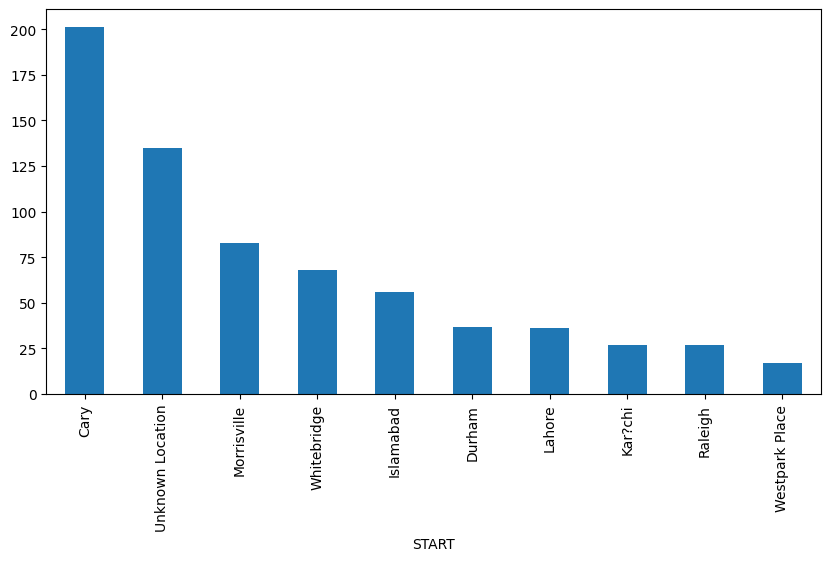

In [135]:
#how many tripa in every start city and visualise graphically
df['START'].value_counts().nlargest(10).plot(kind='bar', figsize=(10,5))

<Axes: xlabel='STOP'>

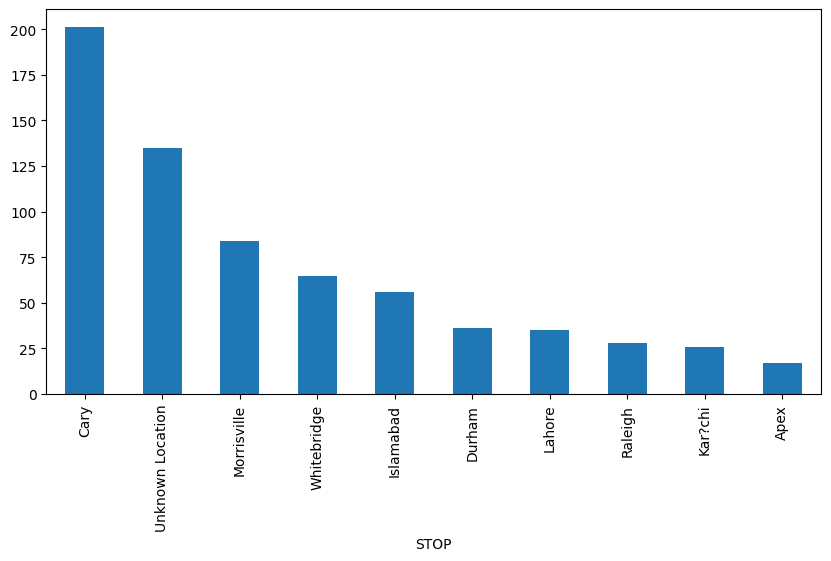

In [136]:
df['STOP'].value_counts().nlargest(10).plot(kind='bar', figsize=(10,5))

In [138]:
# how many trips driven in all months of year and visulaize graphically the top 4 months descending 
import pandas as pd
import plotly.express as px

# Assuming you have a DataFrame named 'df' with a 'START_DATE' column
df['START_DATE'] = pd.to_datetime(df['START_DATE'])

# Extract the month from the 'START_DATE' column
df['Month'] = df['START_DATE'].dt.month

# Calculate the number of trips in each month
trips_per_month = df['Month'].value_counts().sort_index()

# Get the top 4 months
top_months = trips_per_month.nlargest(4)

# Create a DataFrame for plotting
top_months_df = pd.DataFrame({'Month': top_months.index, 'Trips': top_months.values})

# Convert month number to month name
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
top_months_df['Month'] = top_months_df['Month'].apply(lambda month: month_names[month - 1])

# Create a bar plot using Plotly
fig = px.bar(top_months_df, x='Month', y='Trips',color='Trips', title='Top 4 Months with Highest Number of Trips')

# Show the plot
fig.show()


In [141]:
df.columns

Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'PURPOSE',
       'Elapsed_Time', 'KM', 'Velocity', 'Day_of_Week', 'Day_of_Week_Name',
       'Month', 'hour'],
      dtype='object')

In [145]:
df['hour']=df['START_DATE'].dt.hour
df['Month']=df['START_DATE'].dt.month_name()
df['Day']=df['START_DATE'].dt.day_name()

In [146]:
df.head().T

,0,1,2,3,4
START_DATE,2016-01-01 21:11:00,2016-01-02 01:25:00,2016-01-02 20:25:00,2016-01-05 17:31:00,2016-01-06 14:42:00
END_DATE,2016-01-01 21:17:00,2016-01-02 01:37:00,2016-01-02 20:38:00,2016-01-05 17:45:00,2016-01-06 15:49:00
CATEGORY,Business,Business,Business,Business,Business
START,Fort Pierce,Fort Pierce,Fort Pierce,Fort Pierce,Fort Pierce
STOP,Fort Pierce,Fort Pierce,Fort Pierce,Fort Pierce,West Palm Beach
PURPOSE,Meal/Entertain,NaN,Errand/Supplies,Meeting,Customer Visit
Elapsed_Time,6.0,12.0,13.0,14.0,67.0
KM,8.207634,8.0467,7.724832,7.563898,102.514958
Velocity,82.07634,40.2335,35.653071,32.416706,91.80444
Day_of_Week,4,5,5,1,2


In [148]:
# Define a function to categorize time of day
def time_of_day(row):
    if row['START_DATE'].hour >= 5 and row['START_DATE'].hour < 12:
        return 'Morning'
    elif row['START_DATE'].hour >= 12 and row['START_DATE'].hour < 17:
        return 'Afternoon'
    elif row['START_DATE'].hour >= 17 and row['START_DATE'].hour < 21:
        return 'Evening'
    else:
        return 'Night'

# Apply the function to create a new column 'Time_of_Day'
df['Time_of_Day'] = df.apply(time_of_day, axis=1)

In [150]:
# Calculate the number of trips in each time of day category
trips_per_time_of_day = df['Time_of_Day'].value_counts().sort_index()

# Create a DataFrame for plotting
time_of_day_df = pd.DataFrame({'Time_of_Day': trips_per_time_of_day.index, 'Trips': trips_per_time_of_day.values})

# Create a bar plot using Plotly
fig = px.bar(time_of_day_df, x='Time_of_Day', y='Trips', color='Trips',title='Number of Trips by Time of Day')

# Show the plot
fig.show()

In [151]:
df.isna().sum()

START_DATE            0
END_DATE              0
CATEGORY              0
START                 0
STOP                  0
PURPOSE             486
Elapsed_Time          0
KM                    0
Velocity              0
Day_of_Week           0
Day_of_Week_Name      0
Month                 0
hour                  0
Day                   0
Time_of_Day           0
dtype: int64

In [156]:
def explore(col):
    fig =px.histogram(df, x=col, y='KM', title=f'{col} vs KM')
    fig.show()

In [157]:
explore('hour')

In [158]:
explore('Day')

In [159]:
explore('Month')

In [162]:
# def get_max(col):
#     return df[f'[col]:[get_max(col)]')

In [170]:
def seasonal_trips(row):
    month = row['Month']
    if month in ['December', 'January', 'February']:
        return 'Winter'
    elif month in ['March', 'April', 'May']:
        return 'Spring'
    elif month in ['June', 'July', 'August']:
        return 'Summer'
    else:
        return 'Fall'

# Apply the function to create a new column 'Season'
df['Season'] = df.apply(seasonal_trips, axis=1)


In [171]:
import plotly.express as px

# Calculate the count of trips for each season
season_counts = df['Season'].value_counts().reset_index()
season_counts.columns = ['Season', 'Trip_Count']

# Create a bar plot using Plotly
fig = px.bar(season_counts, x='Season', y='Trip_Count', title='Seasonal Trips')

# Show the plot
fig.show()


In [172]:
df['Period']=pd.cut(df['hour'], bins=[0,6,12,18,24], labels=['Night','Morning','Afternoon','Evening'])

In [178]:
import plotly.express as px

# Create a bar plot using Plotly
fig = px.bar(df, x='Period', y='KM', color='Period', title='KM by Period')

# Show the plot
fig.show()
